In [1]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

from forest import Scene

pygame 2.1.2 (SDL 2.0.18, Python 3.8.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 10
plt.rcParams['axes.axisbelow'] = True

In [3]:
def remaining_trees_per_density(nb_runs):
    densities = np.arange(0.1, 1.0, 0.05)
    remaining_trees_count = []
    for density in tqdm(densities):
        mean = 0
        for run in range(nb_runs):
            scene = Scene(density=density, display=False)
            done = False
            while not done:
                changed = scene.update_forest()
                done = not changed
            mean += scene.nb_tree() / scene.grid.initial_nb_trees
        mean /= nb_runs
        remaining_trees_count.append(mean)
    return densities, remaining_trees_count

In [8]:
NB_RUNS = 1
density_values, remaining_trees = remaining_trees_per_density(NB_RUNS)

  0%|          | 0/18 [00:00<?, ?it/s]

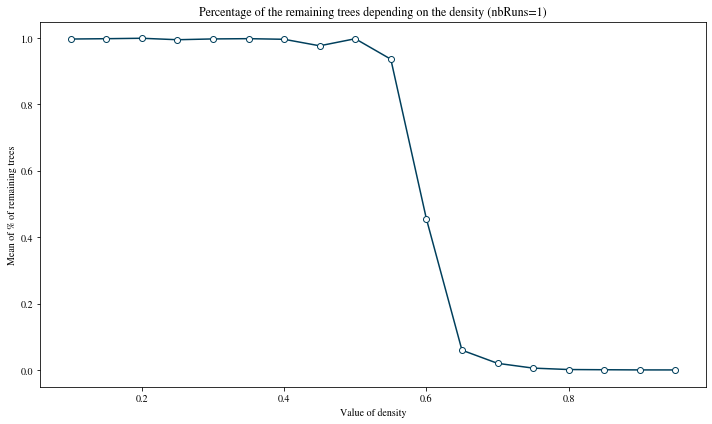

In [29]:
fig, ax=plt.subplots(1, 1, figsize=(10, 6))
ax.plot(density_values, remaining_trees, color='#003f5c', marker='o', markevery=1, markerfacecolor="white")

ax.set_xlabel("Value of density")
ax.set_ylabel("Mean of % of remaining trees")
ax.set_title("Percentage of the remaining trees depending on the density (nbRuns=%d)" % NB_RUNS)
fig.tight_layout()
plt.savefig("images/figure_1.jpg", dpi=400)
plt.show()

In [18]:
def comparing_neighbors_types(nb_runs, density, neighbors_type):
    nb_trees = []
    for run in tqdm(range(nb_runs), desc=f"runs for neighbors of type {neighbors_type}"):
        scene = Scene(density=density, neighbors=neighbors_type, display=False)
        done = False
        index = 1
        while not done:
            changed = scene.update_forest()
            if index >= len(nb_trees):
                nb_trees.insert(index, [scene.nb_tree(), 1])
            else:
                nb_trees[index][0] +=nb_trees[index]
                nb_trees[index][1] += 1
            index += 1
            done = not changed

    for i in range(len(nb_trees)):
        nb_trees[i][0] /= nb_trees[i][1]


    return [element[0] for element in nb_trees]

In [19]:
nb_trees_neumann = comparing_neighbors_types(1, 0.6, "neumann")
nb_trees_moore = comparing_neighbors_types(1, 0.6, "moore")

runs for neighbors of type neumann:   0%|          | 0/1 [00:00<?, ?it/s]

runs for neighbors of type moore:   0%|          | 0/1 [00:00<?, ?it/s]

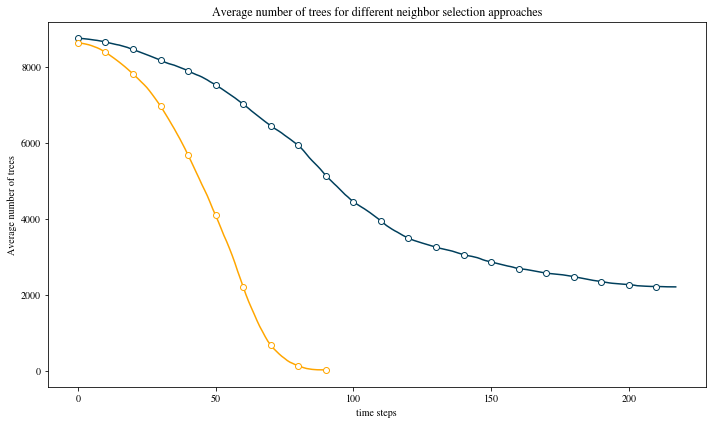

In [28]:
fig, ax=plt.subplots(1, 1, figsize=(10, 6))
ax.plot(nb_trees_neumann, color='#003f5c', marker='o', markevery=10, markerfacecolor="white", label="Von Neumann")
ax.plot(nb_trees_moore, color='#ffa600', marker='o', markevery=10, markerfacecolor="white", label="Moore")

ax.set_xlabel("time steps")
ax.set_ylabel("Average number of trees")
ax.set_title("Average number of trees for different neighbor selection approaches")
fig.tight_layout()
plt.savefig("images/figure_2.jpg", dpi=400)
plt.show()